## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "data.xlsx"
data = pd.read_excel(data)
data

,kV,error kV,D1 (cm),Grosor D1 (cm),D2 (cm),Grosor D2 (cm),λ de Broglie (pm),error λ de Broglie (pm),λ Bragg 1 (pm),error λ Bragg 1 (pm),λ Bragg 2,error λ Bragg 2 (pm)
0,3.0,0.1,3.15,0.37,5.23,0.28,22.391371,0.373190,24.724265,2.874839,23.498220,1.223804
1,3.1,0.1,2.88,0.20,5.20,0.22,22.027260,0.355278,22.623768,1.557827,23.367068,0.962008
2,3.2,0.1,3.06,0.18,5.12,0.23,21.680352,0.338755,24.024681,1.399761,23.017032,1.006971
3,3.3,0.1,3.00,0.22,5.02,0.25,21.349335,0.323475,23.557964,1.711767,22.578886,1.096188
4,3.4,0.1,2.90,0.20,5.10,0.25,21.033031,0.309309,22.779537,1.557552,22.929456,1.094867
5,3.5,0.1,2.70,0.20,4.80,0.24,20.730382,0.296148,21.220637,1.560217,21.612673,1.055739
6,3.6,0.1,2.70,0.20,4.66,0.21,20.440432,0.283895,21.220637,1.560217,20.996212,0.925604
7,3.7,0.1,2.64,0.17,4.64,0.23,20.162318,0.272464,20.752457,1.326834,20.908047,1.014039
8,3.8,0.1,2.54,0.17,4.74,0.20,19.895255,0.261780,19.971655,1.327885,21.348625,0.880536
9,3.9,0.1,2.56,0.20,4.56,0.21,19.638532,0.251776,20.127865,1.561974,20.555143,0.926883


In [2]:
V = data['kV']
V = V*1000
D = data['D2 (cm)']
D = D/100
Verr = data['error kV']
Verr = Verr*1000
Derr = data['Grosor D2 (cm)']
Derr = Derr/100


In [3]:
X = 1/np.sqrt(V)
Xerr = ( 0.5/((V)**(3/2)) )*Verr

Y = D
Yerr = Derr


w = 1/(Yerr**2)

Xerr

0     0.000304
1     0.000290
2     0.000276
3     0.000264
4     0.000252
5     0.000241
6     0.000231
7     0.000222
8     0.000213
9     0.000205
10    0.000198
11    0.000190
12    0.000184
13    0.000177
14    0.000171
15    0.000166
16    0.000160
17    0.000155
18    0.000150
19    0.000146
20    0.000141
dtype: float64

In [4]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

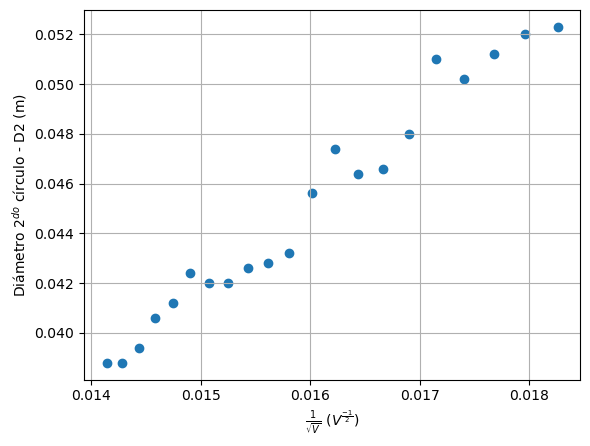

In [5]:
plt.scatter(X,Y)
plt.xlabel(r'$\frac{1}{\sqrt{V}}$ ($V^{\frac{-1}{2}}$)')
plt.ylabel(r'Diámetro $2^{do}$ círculo - D2 (m)')
plt.grid()

In [6]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

model = m*X + b

In [7]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

3.480701502272207
-0.0105726258057014
0.36007422261351346
0.005620555191276126


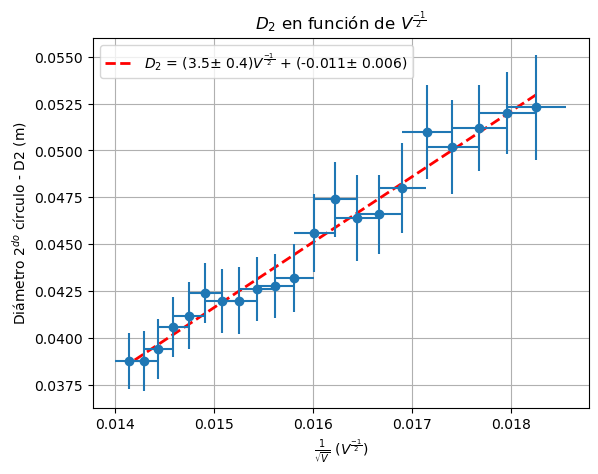

In [8]:
fig1, (ax1) = plt.subplots(1, 1)

ax1.plot(X,model, color='red', linewidth=2, linestyle='--', label=r'$D_2$'f' = ({m:.1f}± {m_std_err:.1f})' r'$V^{\frac{-1}{2}}$' f' + ({b:.3f}± {b_std_err:.3f})')
ax1.errorbar(X, Y, Yerr, Xerr,  fmt='o')

ax1.set_xlabel(r'$\frac{1}{\sqrt{V}}$ ($V^{\frac{-1}{2}}$)')
ax1.set_ylabel(r'Diámetro $2^{do}$ círculo - D2 (m)')
ax1.legend(loc='upper left')
ax1.set_title(r'$D_2$' ' en función de ' r'$V^{\frac{-1}{2}}$')
ax1.grid()

plt.savefig('plot_D2.png', format='png')

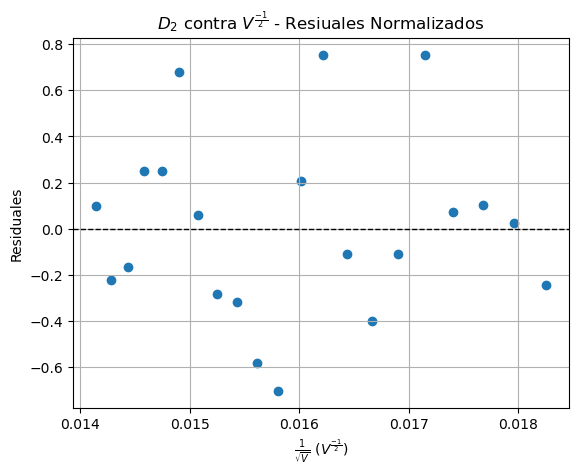

In [9]:
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='black', linewidth=1, linestyle='--')

ax2.set_xlabel(r'$\frac{1}{\sqrt{V}}$ ($V^{\frac{-1}{2}}$)')
ax2.set_ylabel('Residuales')
ax2.set_title(r'$D_2$' ' contra ' r'$V^{\frac{-1}{2}}$' ' - Resiuales Normalizados')
ax2.grid()

plt.savefig('residuales_D2.png', format='png')

In [10]:
#Calculamos h usando el valor conocido de d2

d = 123e-12
e = 1.602176634e-19
me = 9.1093837139e-31
L = 13.5e-2

h = m*(np.sqrt(2*e*me))*d/(2*L)
herr = m_std_err*(np.sqrt(2*e*me))*d/(2*L)

print(h)
print(herr)

8.566882706083658e-34
8.862333149224429e-35


In [13]:
#Calculamos h usando el valor conocido de d2

d = 123e-12
e = 1
me = 510998.95069
L = 13.5e-2
c = 299792458

h = m*(np.sqrt(2*e*me))*d/(2*L)
herr = m_std_err*(np.sqrt(2*e*me))*d/(2*L)

print(h)
print(herr)

1.6029985516878446e-06
1.6582819784253046e-07


In [14]:
print(h/c)
print(herr/c)

5.34702761497704e-15
5.531433277168382e-16


In [15]:
#Calculamos d2 usando el valor conocido de h

h = 6.62607015e-34
e = 1.602176634e-19
me = 9.1093837139e-31
L = 13.5e-2

dcalc = (2*L/m)*(h/np.sqrt(2*e*me))
derr = m_std_err*(2*L/(m**2))*(h/np.sqrt(2*e*me))

print(dcalc)
print(derr)

9.513456135815119e-11
9.841551538490684e-12


In [16]:
#Calculamos d2 usando el valor conocido de h

h = 4.135667696e-15
e = 1
me = 510998.95069
L = 13.5e-2
c = 299792458

dcalc = (2*L/m)*(h/np.sqrt(2*e*me))
derr = m_std_err*(2*L/(m**2))*(h/np.sqrt(2*e*me))

print(dcalc)
print(derr)

3.173347387447034e-19
3.282788233554922e-20


In [17]:
print(dcalc*c)
print(derr*c)

9.513456133706247e-11
9.841551536309082e-12
